# What is MNIST?

MNIST : handwritten digits dataset

# Example of MNIST

- 28 x 28 image
- 1 channel gray image
- 0 ~ 9 digits
<p>실제로는 이 28x28 이미지를 view라는 함수로 784개로 바꾸어 사용한다.

# torchvision

torchvision 패키지는 다양한 유명한 데이터셋들, model architectures, 그리고 데이터에 적용할 수 있는 다양한 transform들로 구성되어있고 실제 이 dataset들을 쉽게 읽어올 수 있도록 torchvision.utils라는 패키지 또한 제공되고 있는 유용한 패키지이다. 이번 강의에서 구현하는 classifier도 이 torchvision을 이용해서 구현될 것이다.<br>
https://pytorch.org/docs/stable/torchvision/index.html

# Reading data

일반적으로 PyTorch의 경우 이미지는 0에서 1사이의 값을 가지게 되고, 순서는 채널, 높이, 너비이다. 하지만 일반적인 이미지는 0에서 255의 값을 가지고 높이, 너비, 채널 순서로 되어있다. 따라서 이 이미지의 순서와 값들을 PyTorch에 맞게 바꿔주는 게 ToTensor의 역할이다.

In [37]:
# ...중략...
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
                         download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
                         download=True)
data_loader = torch.utils.DataLoader(DataLoader=mnist_train, batch_size = 100, shuffle=True, drop_last=True)
# ...중략...
for epoch in range(training_epochs):
# ...중략...
    for X, Y in data_loader: # X 에는 MNIST 이미지, Y에는 레이블(0~9)을 불러옴
        # reshpae input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        # 원래의 X는   [<batch_size>, 1_<channel>, 28_<highth>, 28_<width>] 
        # 바꾼 X는     [<batch_size>, 784]

AttributeError: module 'torch.utils' has no attribute 'DataLoader'

- root : MNIST 데이터가 어디에 있는지 경로설명
- train : True로 할 시 MNIST에 있는 train set, False로 할 시 test set을 불러옴
- transform : MNIST 이미지를 불러올 때 어떤 transform을 적용해서 불러올것인지
- download : 만약 root에 MNIST 데이터가 존재하지 않으면 다운을 받으라는 명령

- DataLoader : 어떤 데이터를 load할 것인지
- batch_size : 이미지를 불러올 때 몇 개씩 잘라서 불러올지
- shuffle : batch_size만큼의 이미지를 불러올 때 순서를 무작위로 할것인지, 있는대로 할것인지 지정
- drop_last : batch_size만큼 잘라서 불러올 때 뒤에 남는 데이터를 어떻게 할 것인지(True면 사용x)

# Epoch / Batch size / Iteration

- one <b>epoch</b>= training set, 전체가 한 번 사용이 되면 한 epoch이 돌았다는 뜻.
- <b>batch size</b>= training set을 잘라서 사용할 때 그 크기
- number of <b>iterations</b>= batch를 몇 번 학습에 사용했는지
<p><b>Example</b> : 만약 1000개의 training exaple이 있을 때 batch size가 500이면 2개의 batch를 이용해서 2 iteration을 학습에 사용하면 1 epoch이 끝났다고 볼 수 있다.

# Softmax

In [46]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# 데이터셋 불러오기

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [47]:
# MNIST data image of shape 28 * 28 = 784
# output 10 : 0 ~ 9 labels 
linear = torch.nn.Linear(784, 10, bias=True).to(device) 
# parameters
training_epochs =15 
batch_size = 100
# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax는 자동으로 계산된다.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1) # linear.parameters() : W, b

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        optimizer.zero_grad()
        hypothesis = linear(X) # classifier가 분류한 결과를 얻는다
        cost = criterion(hypothesis, Y) # 그 결과와 실제 정답을가지고 cross_entropy계산
        cost.backward()
        optimizer.step()
        avg_cost += cost/total_batch
    print("Epoch: ", "%04d"%(epoch+1), "cost =", "{:.9f}".format(avg_cost))

Epoch:  0001 cost = 0.535468519
Epoch:  0002 cost = 0.359274209
Epoch:  0003 cost = 0.331187546
Epoch:  0004 cost = 0.316578060
Epoch:  0005 cost = 0.307158172
Epoch:  0006 cost = 0.300180793
Epoch:  0007 cost = 0.295130223
Epoch:  0008 cost = 0.290851533
Epoch:  0009 cost = 0.287417054
Epoch:  0010 cost = 0.284379512
Epoch:  0011 cost = 0.281825215
Epoch:  0012 cost = 0.279800713
Epoch:  0013 cost = 0.277808994
Epoch:  0014 cost = 0.276154310
Epoch:  0015 cost = 0.274440855


# Test

In [49]:
# Test the model using test sets
with torch.no_grad(): # gradient 계산을 안하겠다는 의미 습관들이기!
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8863000273704529


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Visualization

Label:  8
Prediction:  8


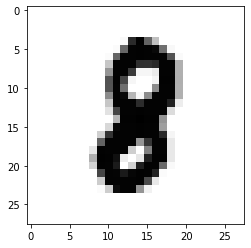

In [59]:
import matplotlib.pyplot as plt
import random
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys",interpolation="nearest")
plt.show()